<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter02_mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.1 신경망과의 첫 만남

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# 케라스에서 MNIST 데이터셋 적재하기

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# 신경망 구조

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [11]:
# 컴파일 단계

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [12]:
# 이미지 데이터 준비
# 훈련 이미지 [0, 255] 사이의 값으로 형성되어있음

train_images = train_images.reshape((len(train_labels), 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((len(test_labels), 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
# 모델 훈련하기

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 11s 21ms/step - loss: 0.2657 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1066 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0697 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0374 - accuracy: 0.9891


In [14]:
# 모델을 사용하여 예측 만들기

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 118ms/step


array([2.3633476e-08, 1.5820047e-08, 3.4418035e-06, 1.1156752e-05,
       2.5766464e-10, 7.2551302e-08, 4.7671838e-13, 9.9998337e-01,
       1.3392558e-07, 1.6640270e-06], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.9999834

In [17]:
test_labels[0]

7

In [18]:
 # 새로운 데이터에서 모델 평가하기

 test_loss, test_acc = model.evaluate(test_images, test_labels)
 print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0639 - accuracy: 0.9790
테스트 정확도: 0.9789999723434448


## 2.2 신경망을 위한 데이터 표현

In [19]:
import numpy as np

In [20]:
# 스칼라(랭크-0 텐서)

x = np.array(12)
x

array(12)

In [21]:
x.ndim

0

In [22]:
# 벡터(랭크-1 텐서)

x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim

1

In [24]:
# 행렬(랭크-2 텐서)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [25]:
# 랭크-3 텐서

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36,2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.ndim

3

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
train_images.dtype

dtype('uint8')

In [30]:
import matplotlib.pyplot as plt

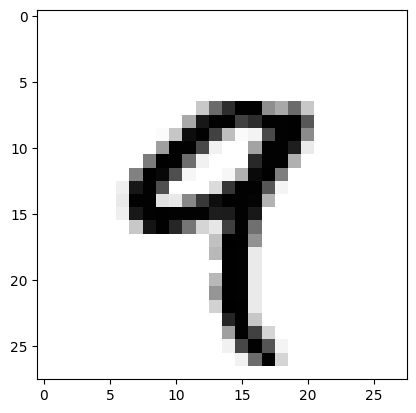

In [31]:
# 다섯 번째 이미지 출력하기

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [32]:
train_labels[4]

9

In [33]:
# 슬라이싱

my_slice = train_images[10: 100]

In [34]:
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [37]:
# 14x14 픽셀을 선택
my_slice = train_images[:, 14:, 14:]

In [38]:
# 음수 인덱스 사용 - 정중앙에 위치한 14X14 픽셀
my_slice = train_images[:, 7: -7, 7:-7]

In [39]:
batch = train_images[:128]

In [40]:
batch = train_images[128:256]

In [41]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]